# 2020-02-07 할 일.
- 노션 순서에 맞게 다시 하자.
- 데이터 정제가 필요한 것을 알았으니 다음 작업 때는 정제를 하자.

In [70]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

패키지를 설명해야할텐데...아나콘다를 깔게 하면 어떨까...?

In [3]:
%matplotlib inline
plt.rcParams['font.family'] = 'NanumGothic'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)

In [15]:
pwd 

'C:\\Users\\park\\Desktop\\pro'

In [71]:
app=pd.read_csv('googleplaystrore.csv')

파일을 불러올 때, 절대경로/상대경로에 대한 설명.
그 외 csv를 제외한 다른 파일들의 확장자명을 설명해주면 좋을 것 같다.

In [19]:
app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [20]:
print(app.shape)

(10841, 13)


# 데이터 타입 확인
데이터를 잠깐 살펴봤을 때, 원

In [21]:
app.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [36]:
# 데이터타입 맞춰주기 -> 리뷰/사이즈 M, price $, last updated 날짜, 버전들은 str 때문에 미리 작업하고 변환하는 작업이 필요함.

'''
app['Reviews'] = app['Reviews'].apply(lambda x: float(x))
app['Size'] = app['Size'].apply(lambda x: float(x))
app['Installs'] = app['Installs'].apply(lambda x: float(x))
app['Price'] = app['Price'].apply(lambda x: float(x))
app['Last Updated'] = app['Last Updated'].apply(lambda x: float(x))
app['Current Ver'] = app['Current Ver'].apply(lambda x: float(x))
app['Android Ver'] = app['Android Ver'].apply(lambda x: float(x))
'''

In [46]:
app['Installs'].value_counts()
# +만 제거하면 될 듯.

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: Installs, dtype: int64

In [45]:
app['Size'].value_counts()
# k와 M 구분을 어떻게 할 것인지. Varies with device 얘는 또 뭘까..? 

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
16M                    149
26M                    149
25M                    143
20M                    139
21M                    138
24M                    136
10M                    136
18M                    133
23M                    117
22M                    114
29M                    103
27M                     97
28M                     95
30M                     84
33M                     79
3.3M                    77
37M                     76
35M                     72
31M                     70
2.9M                    69
2.5M                    68
2.3M                    68
3.4M                    65
2.8M                    65
3.7M                    63
32M                     63
34M                     63
3.9M                    62
3.8M                    62
4

In [42]:
app['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [38]:
app['Category'].nunique()

34

In [22]:
app.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

등급의 널 값이 생각보다 많은데 어떻게 처리하는게 좋은 방법일까...? 그 외의 널 값들도 어떻게 처리하지...?

# 컬럼 간 상관관계
맨 처음 타입을 확인할 때, rating만 숫자였다. 숫자로 나타낼 수 있는 값들은 타입을 변경하는 작업을 해여한다. 

In [34]:
app.corr()

,Rating
Rating,1.000000


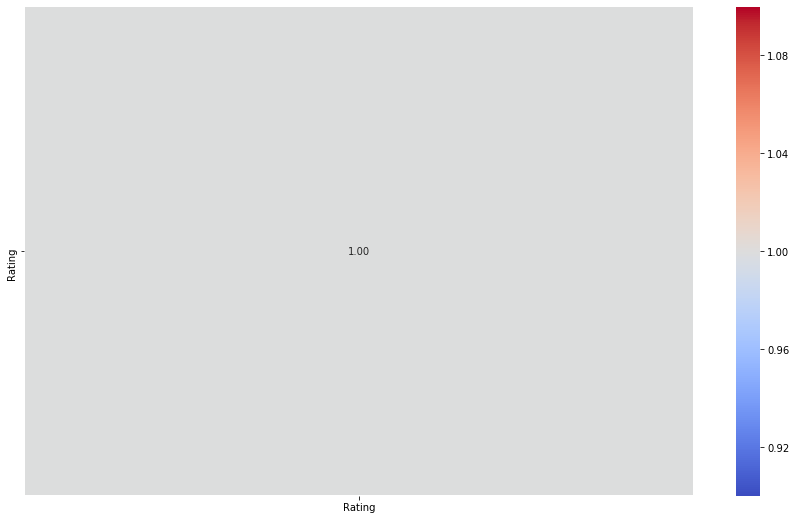

In [35]:
plt.figure(figsize=[15, 9])
sns.heatmap(app.corr(), annot=True, fmt = '.2f', linewidths=0.2, cmap='coolwarm')

# 순위 랭크 세우기.
순위 랭크 세우기 언급만 하면 좋을 듯. 결과를 보면 알겠지만 자세한 수치가 안나왔기 때문에 이 데이터 안에서 랭크 세우는 것이 의미가 없을 것 같음.

In [48]:
installs_rank=app.sort_values(by=['Installs'], axis=0, ascending=False)

In [49]:
installs_rank.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.000000,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,nan
420,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.500000,17714850,40M,"500,000,000+",Free,0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
474,LINE: Free Calls & Messages,COMMUNICATION,4.200000,10790289,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 26, 2018",Varies with device,Varies with device
3767,Flipboard: News For Our Time,NEWS_AND_MAGAZINES,4.400000,1284017,Varies with device,"500,000,000+",Free,0,Everyone 10+,News & Magazines,"August 3, 2018",Varies with device,Varies with device
3574,Cloud Print,PRODUCTIVITY,4.100000,282460,Varies with device,"500,000,000+",Free,0,Everyone,Productivity,"May 23, 2018",Varies with device,Varies with device
3326,Gboard - the Google Keyboard,TOOLS,4.200000,1859109,Varies with device,"500,000,000+",Free,0,Everyone,Tools,"July 31, 2018",Varies with device,Varies with device
431,Viber Messenger,COMMUNICATION,4.300000,11334973,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
4222,imo free video calls and chat,COMMUNICATION,4.300000,4785892,11M,"500,000,000+",Free,0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
3235,Google Translate,TOOLS,4.400000,5745093,Varies with device,"500,000,000+",Free,0,Everyone,Tools,"August 4, 2018",Varies with device,Varies with device
1842,Candy Crush Saga,GAME,4.400000,22429716,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up


# 사분위 확인
rating만 숫자여서 다른 컬럼들 타입을 변경해야함.

In [50]:
app.median() # 중앙값

Rating   4.300000
dtype: float64

In [52]:
app.mean() # 평균

Rating   4.193338
dtype: float64

In [53]:
app.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


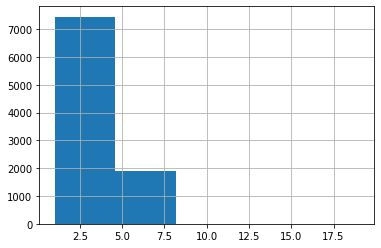

In [63]:
app['Rating'].hist(bins=5) # 이 축의 x,y는 무엇일까..? 

In [68]:
# 뭔가 이상하게 안나온다. 데이터 정제가 필요해보인다.

C:\Users\park\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\park\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\park\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\park\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\park\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


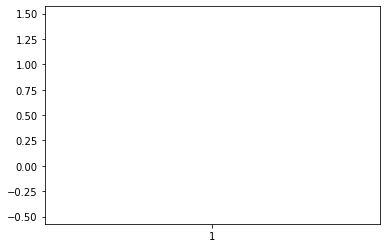

In [66]:
plt.boxplot(app['Rating'])
plt.show()

C:\Users\park\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\park\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\park\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\park\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\park\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


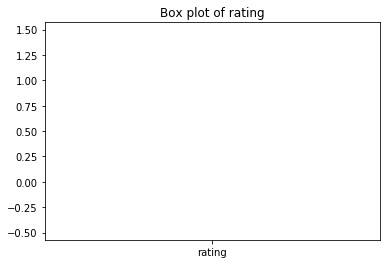

In [67]:
# setting outlier symbol, title, xlabel

plt.boxplot(app['Rating'], sym="bo")

plt.title('Box plot of rating')

plt.xticks([1], ['rating'])

plt.show()



#출처: https://rfriend.tistory.com/410 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]